# Градиентный спуск

In [9]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
step_count = 25
step = 0.1 
def f(x): 
    return (x - 5) ** 2

def der_f(x): 
    return 2 * (x - 5)

In [3]:
x = [0]
y = []
for i in range(step_count): 
    y.append(f(x[i]))
    x.append(x[i] - step * der_f(x[i]))
    

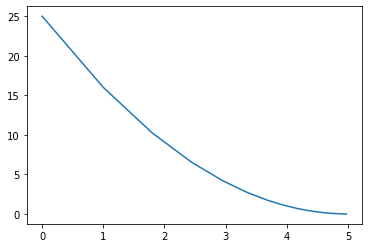

In [5]:
pylab.plot(x[:-1], y)

# XGBoost

In [1]:
import pandas as pd
import numpy as np
from sklearn import ensemble, model_selection, metrics
import xgboost as xgb

In [2]:
df = pd.read_csv('bioresponse.csv')
df.head()

,Activity,D1,D2,D3,D4,D5,D6,D7,D8,D9,...,D1767,D1768,D1769,D1770,D1771,D1772,D1773,D1774,D1775,D1776
0,1,0.000000,0.497009,0.10,0.0,0.132956,0.678031,0.273166,0.585445,0.743663,...,0,0,0,0,0,0,0,0,0,0
1,1,0.366667,0.606291,0.05,0.0,0.111209,0.803455,0.106105,0.411754,0.836582,...,1,1,1,1,0,1,0,0,1,0
2,1,0.033300,0.480124,0.00,0.0,0.209791,0.610350,0.356453,0.517720,0.679051,...,0,0,0,0,0,0,0,0,0,0
3,1,0.000000,0.538825,0.00,0.5,0.196344,0.724230,0.235606,0.288764,0.805110,...,0,0,0,0,0,0,0,0,0,0
4,0,0.100000,0.517794,0.00,0.0,0.494734,0.781422,0.154361,0.303809,0.812646,...,0,0,0,0,0,0,0,0,0,0


In [3]:
X, y = df.iloc[:, 1:], df.iloc[:, 0]

In [4]:
n_trees = np.append([1], np.arange(10, 55, 5))

In [5]:
rf = ensemble.RandomForestClassifier(random_state=0, min_samples_split=5)

In [6]:
cv_rf = model_selection.validation_curve(rf, X, y, param_name='n_estimators', param_range=n_trees, cv=5, n_jobs=-1, 
                                     scoring='accuracy')

In [11]:
train_rf = cv_rf[0].mean(axis=1)
test_rf = cv_rf[1].mean(axis=1)
test_rf

array([0.67581465, 0.76752774, 0.77552597, 0.78006072, 0.78619086,
       0.78885646, 0.79285539, 0.79098944, 0.79472241, 0.79951993])

(0.0, 1.05)

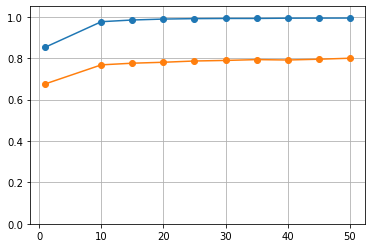

In [10]:
pylab.plot(n_trees, train_rf, '-o')
pylab.plot(n_trees, test_rf, '-o')
pylab.grid()
pylab.ylim(0, 1.05)

In [12]:
xgb_classifier = xgb.XGBClassifier(learning_rate=0.1, max_depth=5,  min_child_weight=3)

In [13]:
cv_xgb = model_selection.validation_curve(xgb_classifier, X, y, param_name='n_estimators', param_range=n_trees, 
                                     n_jobs=-1, cv=3, scoring='accuracy')

In [14]:
train_xgb = cv_xgb[0].mean(axis=1)
test_xgb = cv_xgb[1].mean(axis=1)
test_xgb

array([0.758996  , 0.77339302, 0.77659238, 0.7808567 , 0.78298876,
       0.7859206 , 0.78592102, 0.78565521, 0.78752038, 0.78858684])

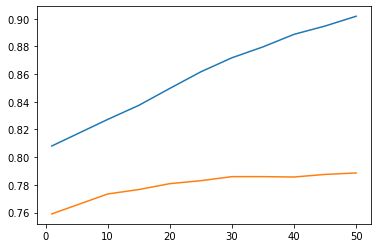

In [15]:
pylab.plot(n_trees, train_xgb)
pylab.plot(n_trees, test_xgb)

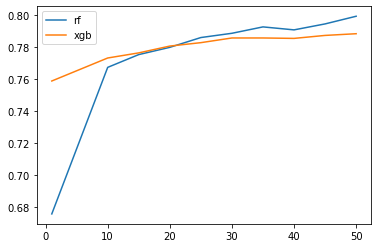

In [19]:
pylab.plot(n_trees, test_rf, label='rf')
pylab.plot(n_trees, test_xgb, label='xgb')
pylab.legend()